In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset=pd.read_csv('electric_vehicles_spec_2025.csv')
dataset

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [20]:
dataset.dtypes

brand                         object
model                         object
top_speed_kmh                  int64
battery_capacity_kWh         float64
battery_type                  object
number_of_cells              float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
fast_charge_port              object
towing_capacity_kg           float64
cargo_volume_l                object
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
source_url                    object
dtype: object

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [22]:
dataset.isna().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [23]:

object_columns = dataset.select_dtypes(include=['object']).columns.tolist()
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(" Object Columns (Categorical):")
print(object_columns)

print("Numeric Columns:")
print(numeric_columns)


 Object Columns (Categorical):
['brand', 'model', 'battery_type', 'fast_charge_port', 'cargo_volume_l', 'drivetrain', 'segment', 'car_body_type', 'source_url']
Numeric Columns:
['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm', 'width_mm', 'height_mm']


In [24]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset_filled = dataset.copy()

In [25]:


for col in numeric_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = dataset[col].median()

    
    dataset_filled[col] = np.where(
        (dataset[col] < lower_bound) | (dataset[col] > upper_bound),
        median,
        dataset[col]
    )


In [ ]:

X = dataset_filled[numeric_cols].drop("range_km", axis=1)
y = dataset_filled["range_km"]

X = X.fillna(X.median())


MSE after filling outliers (Linear Regression): 805.3614372967019
R² score after filling outliers (Linear Regression): 0.9238915418023061


In [34]:
X.isna().sum()


top_speed_kmh                0
battery_capacity_kWh         0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
towing_capacity_kg           0
seats                        0
length_mm                    0
width_mm                     0
height_mm                    0
dtype: int64

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE after filling outliers (Linear Regression):", mse)
print("R² score after filling outliers (Linear Regression):", r2)


MSE after filling outliers (Linear Regression): 805.3614372967019
R² score after filling outliers (Linear Regression): 0.9238915418023061


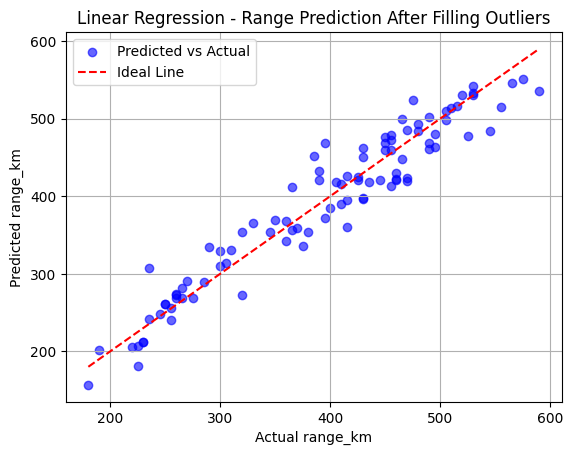

In [27]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel("Actual range_km")
plt.ylabel("Predicted range_km")
plt.title("Linear Regression - Range Prediction After Filling Outliers")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.39%


In [37]:
model.score(X_train, y_train)

0.9220655524605478